<a href="https://www.kaggle.com/code/mohamedyosef101/regression-for-marketing-promotions?scriptVersionId=151899831" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Perform multiple linear regression for marketing promotion data.
---
In this notebook, I'll be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales.

![Sale from unsplash](https://github.com/mohamedyosef101/mohamedyosef101/assets/118842452/b1055892-f6e4-4e18-a8a2-571470720a4a)

# Step 0: Set it UP
---

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# customize the style
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = 12

# load the data
filepath = '/kaggle/input/marketing-promotion/marketing_sales_data.csv'
df = pd.read_csv(filepath)

df.head(2)

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.51807,2.29379,Micro,55.26128
1,Low,7.75688,2.57229,Mega,67.57490


In [2]:
# Rename all columns in data that contain a space. 
df.columns = ['tv', 'radio', 'social_media', 'influencer', 'sales']
df.head(2)

,tv,radio,social_media,influencer,sales
0,Low,3.51807,2.29379,Micro,55.26128
1,Low,7.75688,2.57229,Mega,67.57490


# Step 1: Data exploration
---

Start with an exploratory data analysis to familiarize myself with the data and prepare it for modeling.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            572 non-null    object 
 1   radio         572 non-null    float64
 2   social_media  572 non-null    float64
 3   influencer    572 non-null    object 
 4   sales         572 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


## Explore Categorical variables

In [4]:
# define what are the categorical/numerical variables.
def classify_columns(df):
    cat_cols = [] 
    num_cols = []
    
    for col in df.columns:
        if isinstance(df[col].dtype, (np.number, np.bool_)):
            num_cols.append(col) 
        elif isinstance(df[col].dtype, pd.CategoricalDtype):
            cat_cols.append(col)  
        elif df[col].dtype == object and df[col].nunique()/len(df) < 0.1:
            cat_cols.append(col)
        else:
            num_cols.append(col)

    return cat_cols, num_cols

cat_cols, num_cols = classify_columns(df)
print(f"categorical variables are {cat_cols}\nnumerical variables are {num_cols}")

categorical variables are ['tv', 'influencer']
numerical variables are ['radio', 'social_media', 'sales']


<Axes: xlabel='tv', ylabel='sales'>

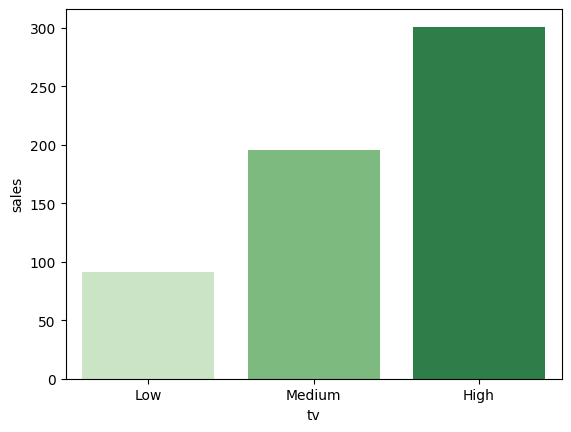

In [5]:
# Explore the relation between TV categories and sales
sns.barplot(data=df, x='tv', y='sales', order=['Low', 'Medium', 'High'], palette='Greens', errorbar=None)

<Axes: xlabel='influencer', ylabel='sales'>

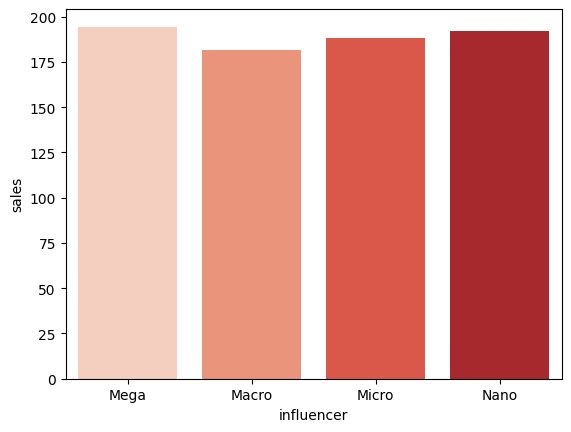

In [6]:
# Explore the relation between 'influencer' and 'sales' 
sns.barplot(data=df, x='influencer', y='sales', order=['Mega', 'Macro', 'Micro', 'Nano'], palette='Reds', errorbar=None)

<div style="background: #e3eefc; padding: 24px 12px; color: #00773E; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold;">since TV categories have a clear relationship with sales, it'll be very helpful in the model.<br>
<span style="color: #BD0000; font-weight: bold;">While influncer categories cannot help.</span></p>
</div>

## Explore Numerical Variables

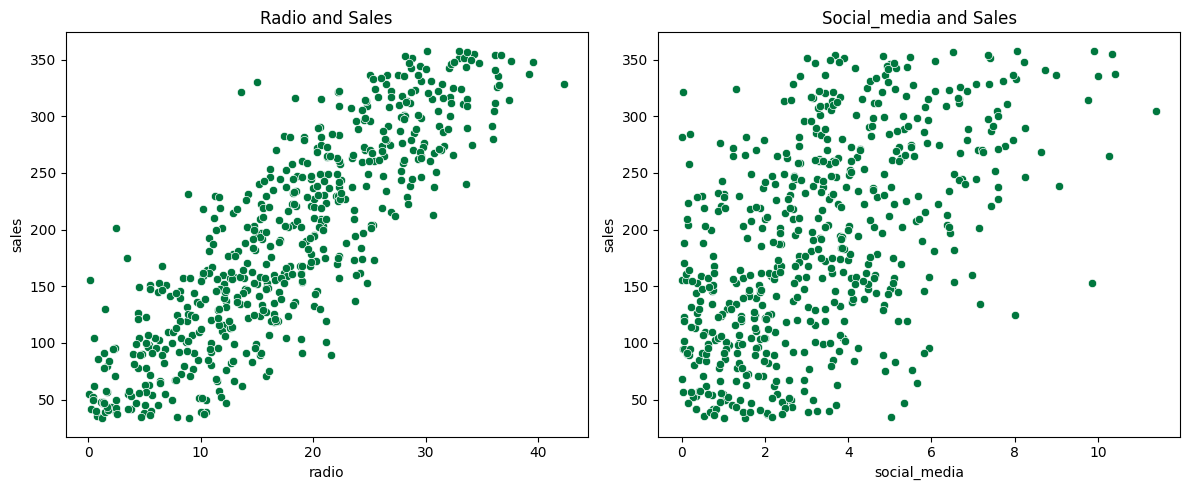

In [7]:
# check the relationship between target variable "sales" and other variables
def scatter_target_num_cols(df, target_col, num_cols):
    num_plots = len(num_cols)
    num_rows = (num_plots + 1) // 2  # Calculate the number of rows needed for two plots per row
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))

    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration
    for i, col in enumerate(num_cols):
        sns.scatterplot(data=df, x=col, y=target_col, ax=axes[i], color="#00773e")
        axes[i].set_title(f'{col.capitalize()} and {target_col.capitalize()}')

    # Hide any extra empty subplots
    for j in range(num_plots, num_rows * 2):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

scatter_target_num_cols(df, 'sales', ['radio', 'social_media'])

<div style="background: #e3eefc; padding: 24px 12px; color: #00773E; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p><b>Radio appear to have linear relationships with Sales. 
<br><span style="color: #0b0000">Given this, Radio may be useful as independent variables in a multiple linear regression model estimating Sales.</span></p>
</b></div>

# Step 2: Model building
---
OLS aims to find the "ordinary least squares" estimates for linear regression models which best fit the observed data

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the OLS formula.
ols_formula = 'sales ~ C(tv) + radio'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = df)

# Fit the model.
model = OLS.fit()

# Set the model results. (We'll evaluate it later)
model_results = model.summary()

## Check model assumptions

### 1. Linearity
Each numerical variable ($X_i$) is linearly related to the target variable ($Y$).

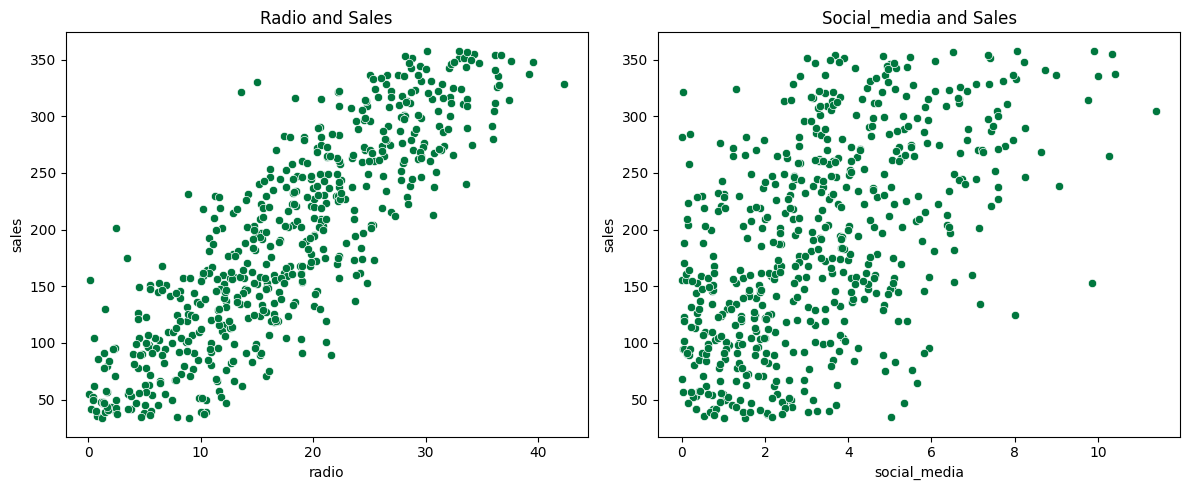

In [9]:
# check linearity
def scatter_target_num_cols(df, target_col, num_cols):
    num_plots = len(num_cols)
    num_rows = (num_plots + 1) // 2  # Calculate the number of rows needed for two plots per row
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))

    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration
    for i, col in enumerate(num_cols):
        sns.scatterplot(data=df, x=col, y=target_col, ax=axes[i], color='#00773E')
        axes[i].set_title(f'{col.capitalize()} and {target_col.capitalize()}')

    # Hide any extra empty subplots
    for j in range(num_plots, num_rows * 2):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

scatter_target_num_cols(df, 'sales', ['radio', 'social_media'])

<div style="background: #e3eefc; padding: 24px 12px; color: #00773E; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold;">The linearity assumption holds for Radio, as there is a clear linear relationship in the scatterplot between Radio and Sales.<br>
<span style="color: #BD0000; font-weight: bold;">Social Media was not included in the preceding multiple linear regression model, but it does appear to have a linear relationship with Sales.</span></p>
</div>

### 2. Normality (Multivariate)
The residuals are normally distributed.

- You can check that using a QQ plot or a histogram
- If you observe a straight diagonal line on the Q-Q plot, then you can proceed in your analysis. You can also plot a histogram of the residuals and check if you observe a normal distribution that way.

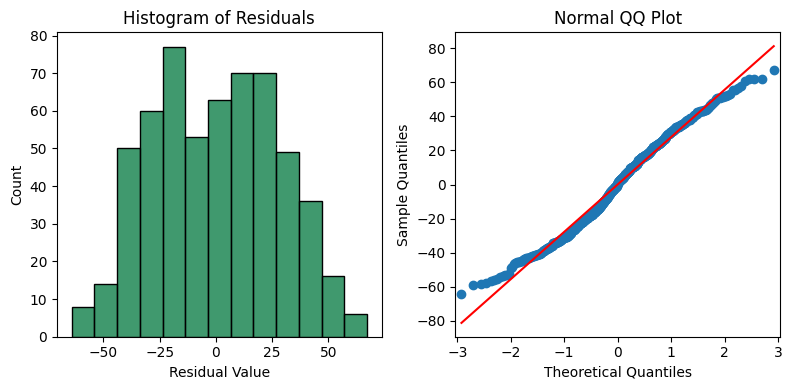

In [10]:
# Calculate the residuals.
residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 
sns.histplot(residuals, ax=axes[0], color="#00773e")
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")

plt.tight_layout()
plt.show()

<div style="background: #e3eefc; padding: 24px 12px; color: #bd0000; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold;">The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model.<br>
<span style="color: #00773e; font-weight: bold;">The residuals in the Q-Q plot form a straight line, further supporting that this assumption is met.</span></p>
</div>

### 3. Homoscedasticity
The variation of the residuals is constant or similar across the model.

- Create a plot of the residuals vs. fitted values.
- If the data points seem to be scattered randomly across the line where residuals equal 0, then you can proceed.

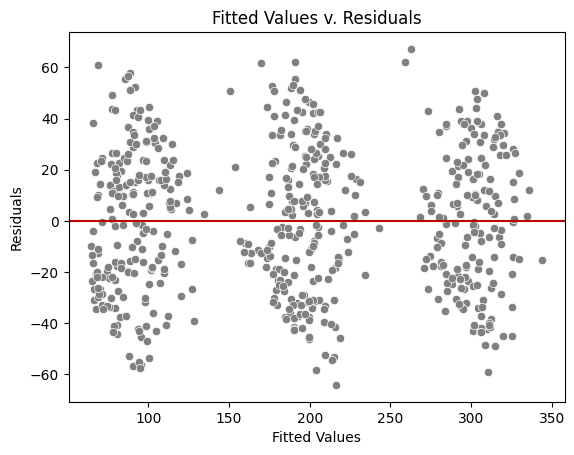

In [11]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid, color="gray")

# Set labels and the title.
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0, color='#BD0000')

# Show the plot.
plt.show()

<div style="background: #e3eefc; padding: 24px 12px; color: #00773E; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold;">The fitted values are in three groups because the categorical variable is dominating in this model, meaning that TV is the biggest factor that decides the sales.<br>
<span style="color: #BD0000; font-weight: bold;">However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.</span></p>
</div>

### 4. No multicollinearity
The variation of the residuals is constant or similar across the model.

- Create a plot of the residuals vs. fitted values.
- If the data points seem to be scattered randomly across the line where residuals equal 0, then you can proceed.

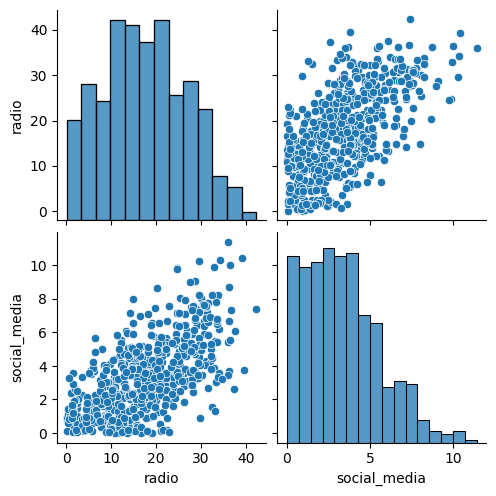

In [12]:
# Create a pairplot of the data.
features = df.drop('sales', axis=1)
sns.pairplot(features)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables. 
X = df[['radio','social_media']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])
df_vif

,VIF
radio,5.17092
social_media,5.17092


<div style="background: #e3eefc; padding: 24px 12px; color: #000b1a; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold;">The preceding model only has one continous independent variable, meaning there are no multicollinearity issues.<br>
<span style="color: #BD0000; font-weight: bold;">If a model used both Radio and Social_Media as predictors, there would be a moderate linear relationship between Radio and Social_Media that violates the multicollinearity assumption. Furthermore, the variance inflation factor when both Radio and Social_Media are included in the model is 5.17 for each variable, indicating high multicollinearity.</span></p>
</div>

# Step 3: Results and evaluation
---
### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [14]:
# Display the model results summary.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.63e-288
Time:                        23:47:52   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(tv)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(tv)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div style="background: #e3eefc; padding: 24px 12px; color: #00773E; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold;">Using TV and Radio as the independent variables results in a multiple linear regression model with  𝑅2=0.904
 . In other words, the model explains  90.4%
  of the variation in Sales. This makes the model an excellent predictor of Sales.</p>
</div>

# Key Findings
According to the model, high TV promotional budgets result in significantly more sales than medium and low TV promotional budgets. For example, the model predicts that a Low TV promotion is 154.2971 lower on average than a high TV promotion given the same Radio promotion.

The coefficient for radio is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is  0.000
 , meaning all coefficients are statistically significant at  𝑝=0.05
 . The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders.

For example, there is a  95%
  chance the interval  [−163.979,−144.616]
  contains the true parameter of the slope of  𝛽𝑇𝑉𝐿𝑜𝑤
 , which is the estimated difference in promotion sales when a low TV promotional budget is chosen instead of a high TV promotion budget.

## Recommendations
High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by  $75.3120
  million (95% CI  [−82.431,−68.193])
 , and switching from a high to low TV promotional budget reduces sales by  $154.297
  million (95% CI  [−163.979,−144.616])
 . The model also estimates that an increase of  $1
  million in the radio promotional budget will yield a  $2.9669
  million increase in sales (95% CI  [2.551,3.383]
 ).

Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales.

# **Useful Resources**

* Google LLC. (2023). [*Regression Analysis: Simplify Complex Data Relationships*](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships?specialization=google-advanced-data-analytics). Coursera

* Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data). Kaggle Datasets.

* Kylie Ying. (2022). [*Machine Learning for Everybody: Regression*](https://youtu.be/i_LwzRVP7bg?si=OKiUNxm4eOTf8OxQ). YouTube.

* DATAtab. (2021). [*Regression Analysis | Full course*](https://youtu.be/0m-rs2M7K-Y?si=P6_Z7odr6IxR2DqX). YouTube

--- 

💬 If you have any question, feel free to send me a message on **[LinkedIn](https://linkedin.com/in/mohamedyosef101)**.